<h3 style='Background:purple; border:0; color:white'><center>Linear Regression</center></h3>

<img src="https://img.jakpost.net/c/2018/03/08/2018_03_08_41880_1520479714._large.jpg" align="center"/>

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:crimson; border:0' role="tab" aria-controls="home"><center>Navigation</center></h3>

* [**Libraries**](#10)
* [**best fit slope**](#20)
* [**Y intercept**](#30)
* [**Testing Regression**](#40)
* [**Training**](#50)


<h3><center>Linear Regression</center></h3>
<ui>
<li>It's the equation of a line, Y = mx + b</li>
<li>m = slope, y = Y intercept</li>
<li>For Regression, we've to calculate the slope and the Y intercept</li>
<li>Then we calculate the equation of a line</li>
<li>Regression is best used to predict simple scenarios to understand the relationship between 2 variables a changeable and unchangeable</li>
<li>Examples of linear Regression are: Drug usage and blood pressure, measure the effect of fertilizer and water on crop yields </li>
</ui>

---

### Y = mx + b

### Slope = $( ($ ($(mean of x) \times $(mean of y)) - (mean of XY)$)   \div   $($(mean of X)^2$) - (mean of $X^2$) )

<a id=10> </a>
<h4 style='color:white; background:crimson; border:0'><center>Libraries</center></h4>

In [1]:
import numpy as np
from statistics import mean, median
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
x = np.array([1,2,3,4,5,6], dtype =np.float64)
y = np.array([5,4,6,5,6,7], dtype =np.float64)

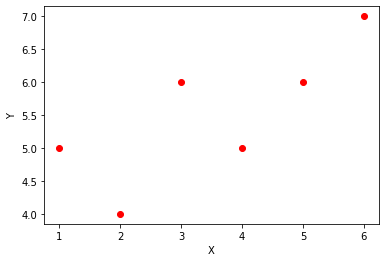

In [3]:
plt.scatter(x,y,color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

<a id=20> </a>
<h4 style='color:white; background:crimson; border:0'><center>Best fit slope</center></h4>

In [4]:
def best_fit_slope(x,y):
    #line slope (M)
    m=( ((mean(x) * mean(y)) - (mean(x*y))) / 
        ( (np.square(mean(x)) - mean(np.square(x))) ) )
    return m

In [5]:
m = best_fit_slope(x,y)
m

0.42857142857142866

<a id=30> </a>
<h4 style='color:white; background:crimson; border:0'><center>Y Intercept</center></h4>

In [6]:
def intercept(x,y):
    #Y intercept
    b = (mean(y) - (best_fit_slope(x,y)*mean(x)))
    return b

In [7]:
b = intercept(x,y)
b

4.0

<a id=40> </a>
<h4 style='color:white; background:crimson; border:0'><center>Testing Regression</center></h4>

sample of a regression lime

In [8]:
r = [ (best_fit_slope(x,y)*x) + b for xs in x]

In [9]:
r

[array([4.42857143, 4.85714286, 5.28571429, 5.71428571, 6.14285714,
        6.57142857]),
 array([4.42857143, 4.85714286, 5.28571429, 5.71428571, 6.14285714,
        6.57142857]),
 array([4.42857143, 4.85714286, 5.28571429, 5.71428571, 6.14285714,
        6.57142857]),
 array([4.42857143, 4.85714286, 5.28571429, 5.71428571, 6.14285714,
        6.57142857]),
 array([4.42857143, 4.85714286, 5.28571429, 5.71428571, 6.14285714,
        6.57142857]),
 array([4.42857143, 4.85714286, 5.28571429, 5.71428571, 6.14285714,
        6.57142857])]

---

In [10]:
type(r)

list

Regression Line list

In [11]:
def Regression_line(x, y):
    #y=mx+b
    for xs in x:
        Regressionline = np.array([])
        Regressionline = np.append(Regressionline,((best_fit_slope(x,y)*x) + intercept(x,y)))
        return Regressionline

In [12]:
rl=Regression_line(x,y)
rl

array([4.42857143, 4.85714286, 5.28571429, 5.71428571, 6.14285714,
       6.57142857])

---

make sure all the data is the same type

In [13]:
type(rl), type(x), type(y)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

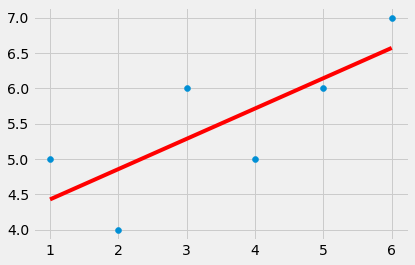

In [14]:
style.use('fivethirtyeight')
plt.scatter(x,y)
plt.plot(x, Regression_line(x,y), color='r')
plt.show()

Make prediction

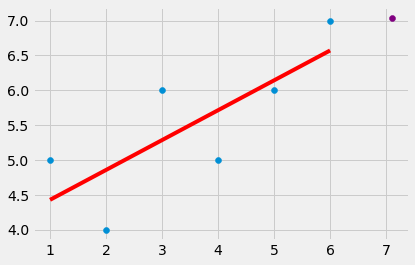

In [15]:
predicted_x=7.1
predicted_y = ((best_fit_slope(x,y)*predicted_x)+b)

plt.scatter(x,y)
plt.plot(x, Regression_line(x,y), color='r')
plt.scatter(predicted_x,predicted_y, color='purple')
plt.show()

<a id=10> </a>
<h4 style='color:white; background:crimson; border:0'><center>Training</center></h4>

<h4>Mean squared Error</center></h4> 
<ul>
<li>The error is the distance between the point and the distance line</li>
<li>Then we square the error to deal with only positive value, and to eliminate outlaw point</li>
<li>with the squared error of one value not we need to do the same for all the all other values sum it and divide them by the length of the errors we've</li>
<li>Now we've the mean of squared error values</li>
</ul>

---

<h4>R squared error</h4>

$r^2$ = 1 - ($\frac {SE*Best fit} {SE*mean(y)}$)

In [16]:
def squared_error(y_orig, y_line):
    return sum(np.square(y_line-y_orig))

In [17]:
def coefficientOfDetermination(y_orig,y_line):
    y_mean_line = [mean(y_orig) for y in y_orig]
    squared_error_reg = squared_error(y_orig,y_line)
    squared_error_ymean = squared_error(y_orig,y_mean_line)
    return 1 - (squared_error_reg / squared_error_ymean)

In [18]:
r_squared = coefficientOfDetermination(y,rl)
print(r_squared)

0.5844155844155845
